Epoch 0, Loss: 0.4185
Epoch 1000, Loss: 0.0202
Epoch 2000, Loss: 0.0204
Epoch 3000, Loss: 0.0203
Epoch 4000, Loss: 0.0203
Epoch 5000, Loss: 0.0203
Epoch 6000, Loss: 0.0203
Epoch 7000, Loss: 0.0202
Epoch 8000, Loss: 0.0202
Epoch 9000, Loss: 0.0202
Test Accuracy: 0.97


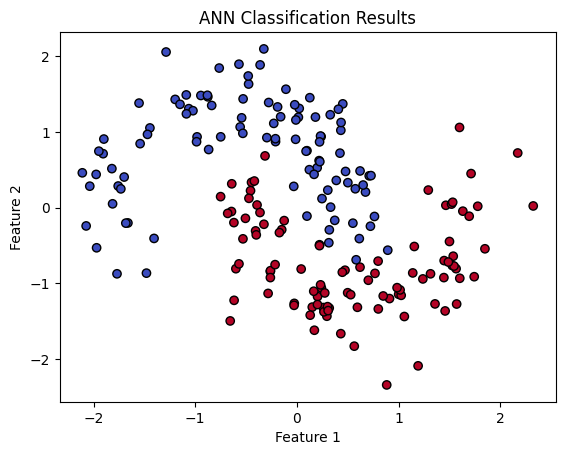

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Generate synthetic dataset
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
y = y.reshape(-1, 1)  # Reshape y for compatibility

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural Network parameters
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
learning_rate = 0.1
epochs = 10000

# Initialize weights and biases
np.random.seed(42)
W1 = np.random.randn(input_size, hidden_size)
B1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
B2 = np.zeros((1, output_size))

# Training process
for epoch in range(epochs):
    # Forward pass
    Z1 = np.dot(X_train, W1) + B1
    A1 = sigmoid(Z1)
    Z2 = np.dot(A1, W2) + B2
    A2 = sigmoid(Z2)

    # Compute loss (Mean Squared Error)
    loss = np.mean((A2 - y_train) ** 2)

    # Backpropagation
    dA2 = (A2 - y_train)
    dZ2 = dA2 * sigmoid_derivative(A2)
    dW2 = np.dot(A1.T, dZ2)
    dB2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * sigmoid_derivative(A1)
    dW1 = np.dot(X_train.T, dZ1)
    dB1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W2 -= learning_rate * dW2
    B2 -= learning_rate * dB2
    W1 -= learning_rate * dW1
    B1 -= learning_rate * dB1

    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Testing
Z1_test = np.dot(X_test, W1) + B1
A1_test = sigmoid(Z1_test)
Z2_test = np.dot(A1_test, W2) + B2
A2_test = sigmoid(Z2_test)
y_pred = (A2_test > 0.5).astype(int)

# Compute accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2f}")

# Visualization
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred.flatten(), cmap='coolwarm', edgecolors='k')
plt.title("ANN Classification Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
